<a href="https://colab.research.google.com/github/jellyho/AI_Learning_jellyho/blob/main/4_Decision_Tree%26KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 셋 불러오기

In [1]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('label', np.unique(y))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

label [0 1 2]


결정경계 시각화 함수

In [3]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
  
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1],c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o',s=100,label='test set')

결정트리로 훈련.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


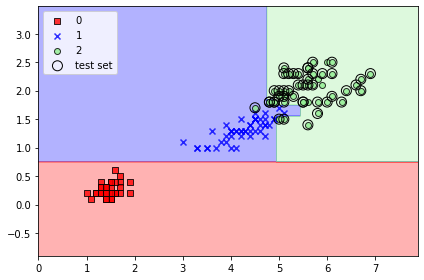

In [6]:
from sklearn.tree import DecisionTreeClassifier as DTC
tree = DTC(criterion='gini', max_depth=10, random_state=1)
tree.fit(X_train, y_train)

plot_decision_regions(X,y,classifier=tree,test_idx=range(105,150))
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

랜덤 포레스트를 통한 훈련

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


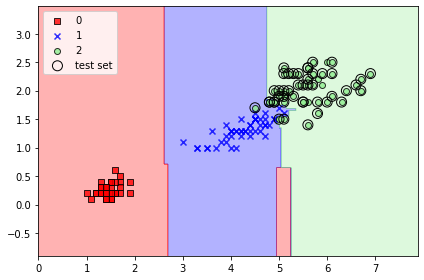

In [13]:
from sklearn.ensemble import RandomForestClassifier as RFC
forest = RFC(criterion='gini', n_estimators=50, random_state=45, n_jobs=8)
forest.fit(X_train, y_train)
plot_decision_regions(X,y,classifier=forest,test_idx=range(105,150))
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

KNN 알고리즘

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


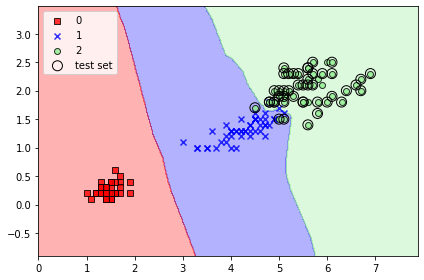

In [14]:
from sklearn.neighbors import KNeighborsClassifier as KNC
knn = KNC(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train)
plot_decision_regions(X,y,classifier=knn,test_idx=range(105,150))
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()